### Importación de datos



In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga de URLs
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Creación de DataFrames
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agrupamos en una lista para facilitar los cálculos
lista_tiendas = [
    ("Tienda 1", tienda),
    ("Tienda 2", tienda2),
    ("Tienda 3", tienda3),
    ("Tienda 4", tienda4)
]

print("Datos cargados y listos.")

Datos cargados y listos.


#1. Análisis de facturación



In [6]:
print("--- 1. INGRESO TOTAL POR TIENDA ---")

for nombre, df in lista_tiendas:
    ingreso_total = df['Precio'].sum()
    print(f"{nombre}: ${ingreso_total:,.2f}")

--- 1. INGRESO TOTAL POR TIENDA ---
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


# 2. Ventas por categoría

In [7]:
print("--- 2. VENTAS POR CATEGORÍA ---")

for nombre, df in lista_tiendas:
    print(f"\nResultados para: {nombre}")
    # Contamos los valores y mostramos los 5 primeros
    print(df['Categoría del Producto'].value_counts().head())

--- 2. VENTAS POR CATEGORÍA ---

Resultados para: Tienda 1
Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
Name: count, dtype: int64

Resultados para: Tienda 2
Categoría del Producto
Muebles                 442
Electrónicos            422
Juguetes                313
Electrodomésticos       305
Deportes y diversión    275
Name: count, dtype: int64

Resultados para: Tienda 3
Categoría del Producto
Muebles                 499
Electrónicos            451
Juguetes                315
Electrodomésticos       278
Deportes y diversión    277
Name: count, dtype: int64

Resultados para: Tienda 4
Categoría del Producto
Muebles                 480
Electrónicos            451
Juguetes                338
Deportes y diversión    277
Electrodomésticos       254
Name: count, dtype: int64


# 3. Calificación promedio de la tienda


In [8]:
print("--- 3. CALIFICACIÓN PROMEDIO ---")

for nombre, df in lista_tiendas:
    promedio = df['Calificación'].mean()
    print(f"{nombre}: {promedio:.2f} / 5.0")

--- 3. CALIFICACIÓN PROMEDIO ---
Tienda 1: 3.98 / 5.0
Tienda 2: 4.04 / 5.0
Tienda 3: 4.05 / 5.0
Tienda 4: 4.00 / 5.0


# 4. Productos más y menos vendidos

In [9]:
print("--- 4. PRODUCTOS ESTRELLA Y MENOS VENDIDOS ---")

for nombre, df in lista_tiendas:
    conteo = df['Producto'].value_counts()

    mas_vendido = conteo.idxmax()
    cantidad_mas = conteo.max()

    menos_vendido = conteo.idxmin()
    cantidad_menos = conteo.min()

    print(f"\n{nombre}:")
    print(f"   Más vendido:  {mas_vendido} ({cantidad_mas} unidades)")
    print(f"   Menos vendido: {menos_vendido} ({cantidad_menos} unidades)")

--- 4. PRODUCTOS ESTRELLA Y MENOS VENDIDOS ---

Tienda 1:
   Más vendido:  Microondas (60 unidades)
   Menos vendido: Auriculares con micrófono (33 unidades)

Tienda 2:
   Más vendido:  Iniciando en programación (65 unidades)
   Menos vendido: Juego de mesa (32 unidades)

Tienda 3:
   Más vendido:  Kit de bancas (57 unidades)
   Menos vendido: Bloques de construcción (35 unidades)

Tienda 4:
   Más vendido:  Cama box (62 unidades)
   Menos vendido: Guitarra eléctrica (33 unidades)


# 5. Envío promedio por tienda

In [10]:
print("--- 5. COSTO DE ENVÍO PROMEDIO ---")

for nombre, df in lista_tiendas:
    envio_prom = df['Costo de envío'].mean()
    print(f"{nombre}: ${envio_prom:,.2f}")

--- 5. COSTO DE ENVÍO PROMEDIO ---
Tienda 1: $26,018.61
Tienda 2: $25,216.24
Tienda 3: $24,805.68
Tienda 4: $23,459.46


# **6. Graficas**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Importamos seaborn para mejorar la estética automáticamente

# Configurar un estilo visual más bonito (opcional, pero recomendado)
sns.set_theme(style="whitegrid")

# Unimos las 4 tiendas en un solo DataFrame grande para análisis globales
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

print(f"Datos consolidados. Total de ventas registradas: {len(df_total)}")

Datos consolidados. Total de ventas registradas: 9435


# Comparación de Ingresos Totales

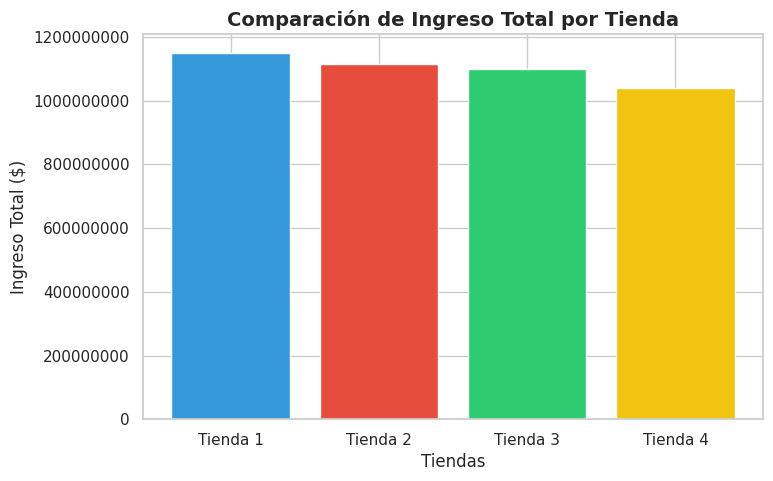

In [12]:
# --- PREPARACIÓN DE DATOS ---
nombres_tiendas = []
ingresos_totales = []

# Recorremos la lista que creamos al principio para extraer los datos
for nombre, df in lista_tiendas:
    nombres_tiendas.append(nombre)
    ingresos_totales.append(df['Precio'].sum())

# --- CREACIÓN DEL GRÁFICO ---
plt.figure(figsize=(8, 5)) # Tamaño del gráfico (ancho, alto)

# Creamos el gráfico de barras
plt.bar(nombres_tiendas, ingresos_totales, color=['#3498db', '#e74c3c', '#2ecc71', '#f1c40f'])

# Añadimos títulos y etiquetas
plt.title('Comparación de Ingreso Total por Tienda', fontsize=14, fontweight='bold')
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Ingreso Total ($)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y') # Para evitar notación científica en el eje Y

plt.show()

# Categorías Más Populares

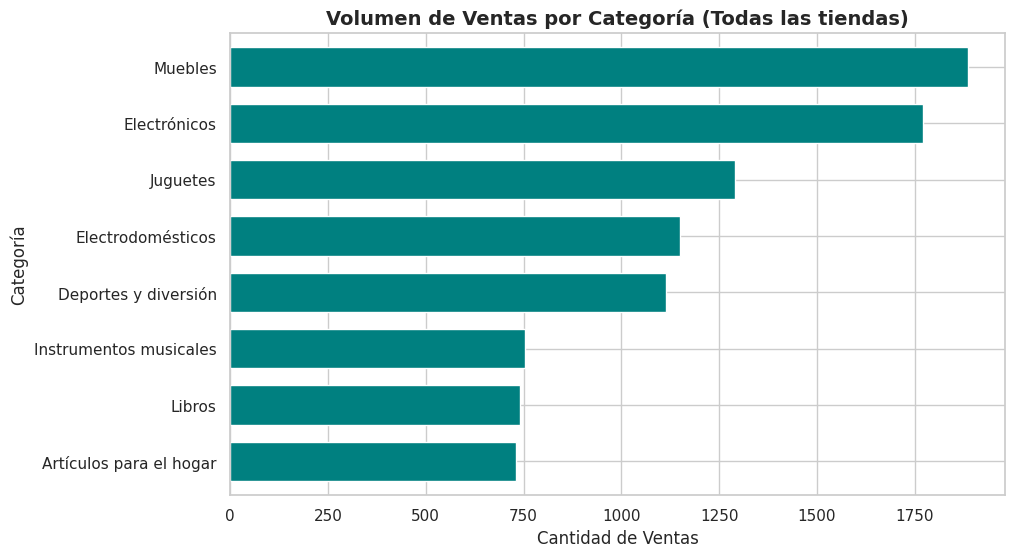

In [13]:
# --- PREPARACIÓN DE DATOS ---
# Contamos las ventas por categoría en el DataFrame total
# Usamos .sort_values(ascending=True) para que la barra más larga quede arriba en el gráfico horizontal
ventas_por_categoria = df_total['Categoría del Producto'].value_counts().sort_values(ascending=True)

# --- CREACIÓN DEL GRÁFICO ---
plt.figure(figsize=(10, 6))

# Creamos el gráfico de barras horizontales (barh)
ventas_por_categoria.plot(kind='barh', color='teal', width=0.7)

# Añadimos títulos y etiquetas
plt.title('Volumen de Ventas por Categoría (Todas las tiendas)', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de Ventas', fontsize=12)
plt.ylabel('Categoría', fontsize=12)

plt.show()

# Relación Precio vs. Calificación

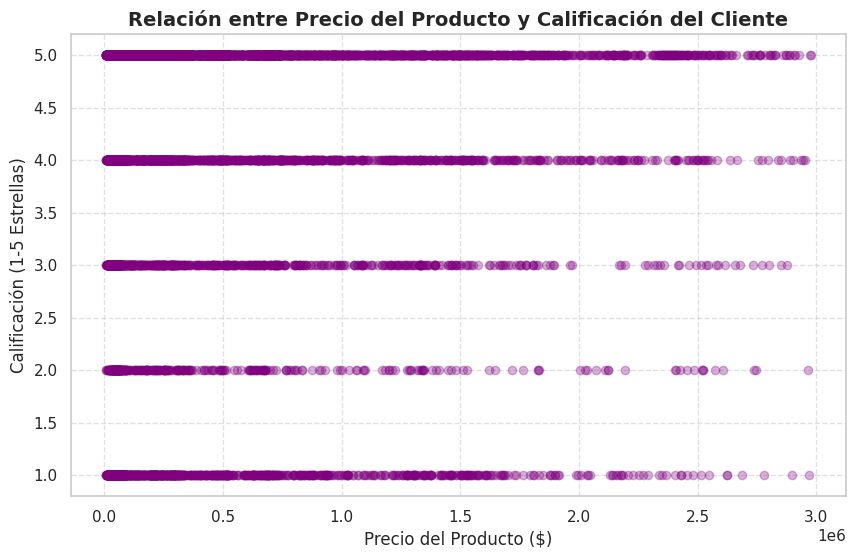

In [14]:
# --- CREACIÓN DEL GRÁFICO ---
plt.figure(figsize=(10, 6))

# Creamos el scatter plot
# alpha=0.3 hace los puntos semitransparentes para ver dónde se agrupan más datos
plt.scatter(df_total['Precio'], df_total['Calificación'], color='purple', alpha=0.3)

# Añadimos títulos y etiquetas
plt.title('Relación entre Precio del Producto y Calificación del Cliente', fontsize=14, fontweight='bold')
plt.xlabel('Precio del Producto ($)', fontsize=12)
plt.ylabel('Calificación (1-5 Estrellas)', fontsize=12)

# Añadimos una cuadrícula para facilitar la lectura
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

# **7. Informe Final**

La Tienda 1 es la reina de las ventas. Facturó más de $1,150 millones, lo que la pone muy por encima de las demás. En cambio, la Tienda 4 es la que menos dinero trajo a la mesa ($1,038 millones), quedándose bastante atrás del primer lugar.
Aquí hay una sorpresa. Aunque la Tienda 1 vende muchísimo, sus clientes son los menos satisfechos (3.98 de calificación). La Tienda 3 es la favorita de la gente, con el mejor promedio de estrellas (4.05). ¡La gente sale feliz de ahí!
Envíos y Productos
En todas las tiendas, lo que más se vende son Muebles. Es nuestro producto estrella en todos lados.
La Tienda 4 tiene el envío más barato, pero curiosamente, eso no le ayudó a vender más que las otras.
Recomendación Final
Si el Sr. Juan necesita vender (deshacerse de) una de las tiendas, mi recomendación es clara:
Debería vender la Tienda 4.

Sencillamente porque es la menos rentable. Aunque tienen envíos baratos y una calificación decente, los números no mienten: es la que menos ingresos genera. Comparada con la Tienda 1 (que es una máquina de hacer dinero) o la Tienda 3 (que tiene la mejor reputación), la Tienda 4 es el eslabón más débil de la cadena en este momento.
